**Exploratory Data Analysis of VIDEO GAMES data set**


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\shash\\Downloads\\vgsales.csv')
data.dropna(axis=0,how='any',inplace=True)
data = data.reset_index()
data.drop(labels=['index','Rank'],axis=1,inplace=True)

In [3]:
data.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [4]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
data.groupby('Genre').size()

Genre
Action          3251
Adventure       1274
Fighting         836
Misc            1686
Platform         875
Puzzle           570
Racing          1225
Role-Playing    1470
Shooter         1282
Simulation       848
Sports          2304
Strategy         670
dtype: int64

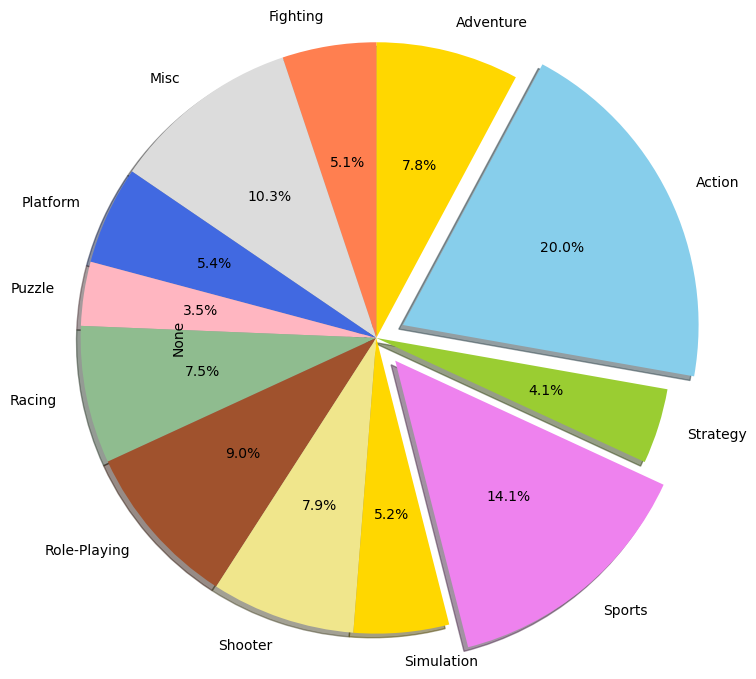

In [14]:
colors = ['skyblue', 'gold', 'coral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']
data.groupby('Genre').size().plot.pie(autopct="%1.1f%%", colors=colors, explode=(0.2,0,0,0,0,0,0,0,0,0,0.2,0), radius=2, startangle=350, shadow=True)

Global sales in each genre

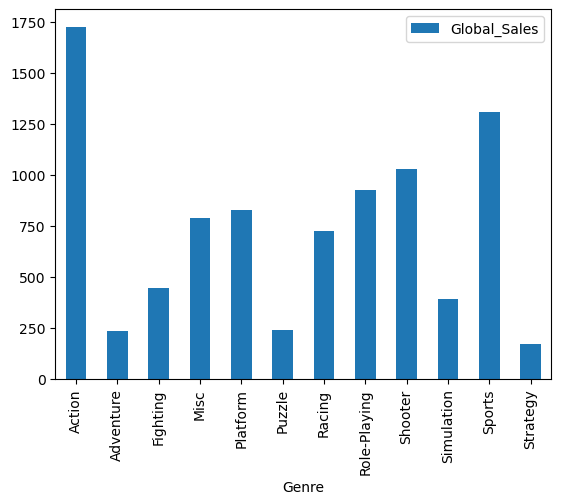

In [15]:
data.groupby('Genre')['Global_Sales'].sum().plot(kind='bar', legend='Global Sales')

Breakdown of sales in each region

In [17]:
genre = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role Playing',  'Shooter', 'Simulation',  'Sports', 'Strategy']

genre_NA = data.groupby('Genre')['NA_Sales'].sum().values
genre_EU = data.groupby('Genre')['EU_Sales'].sum().values
genre_JP = data.groupby('Genre')['JP_Sales'].sum().values
genre_Other = data.groupby('Genre')['Other_Sales'].sum().values
x = range(12)

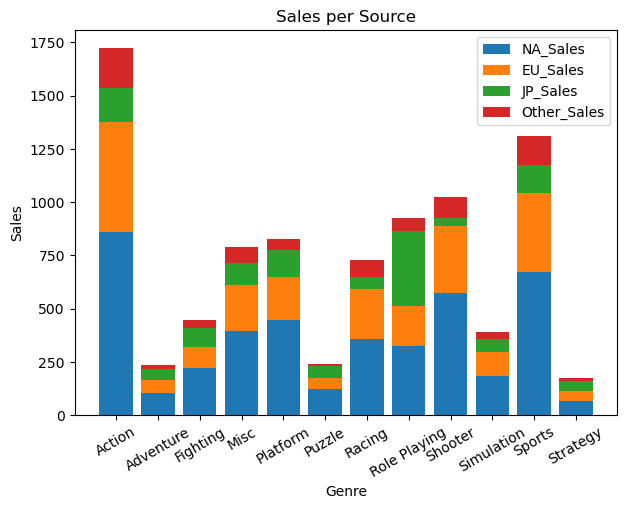

In [19]:
JP_bottom = np.add(genre_NA, genre_EU)
Other_bottom = np.add(JP_bottom, genre_JP)

plt.figure(figsize=(7, 5))
ax = plt.subplot()
plt.bar(x, genre_NA)
plt.bar(x, genre_EU,bottom=genre_NA)
plt.bar(x, genre_JP, bottom=JP_bottom)
plt.bar(x, genre_Other,bottom=Other_bottom)


ax.set_xticks(range(len(genre)))
ax.set_xticklabels(genre, rotation=30)
plt.title('Sales per Source')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.show()

Case Study of Sales of PS, PS2, PS3, PS4

In [20]:
l1 = ['PS','PS2','PS3','PS4']
l2 = np.sort(data.Year.unique())

res = np.zeros((4,len(l2)))
for i in range(len(l1)):
    for j in range(len(l2)):
        for k in range(len(data)):
            if (data['Year'][k]==l2[j] and data['Platform'][k]==l1[i]):
                res[i][j] += data["Global_Sales"][k]

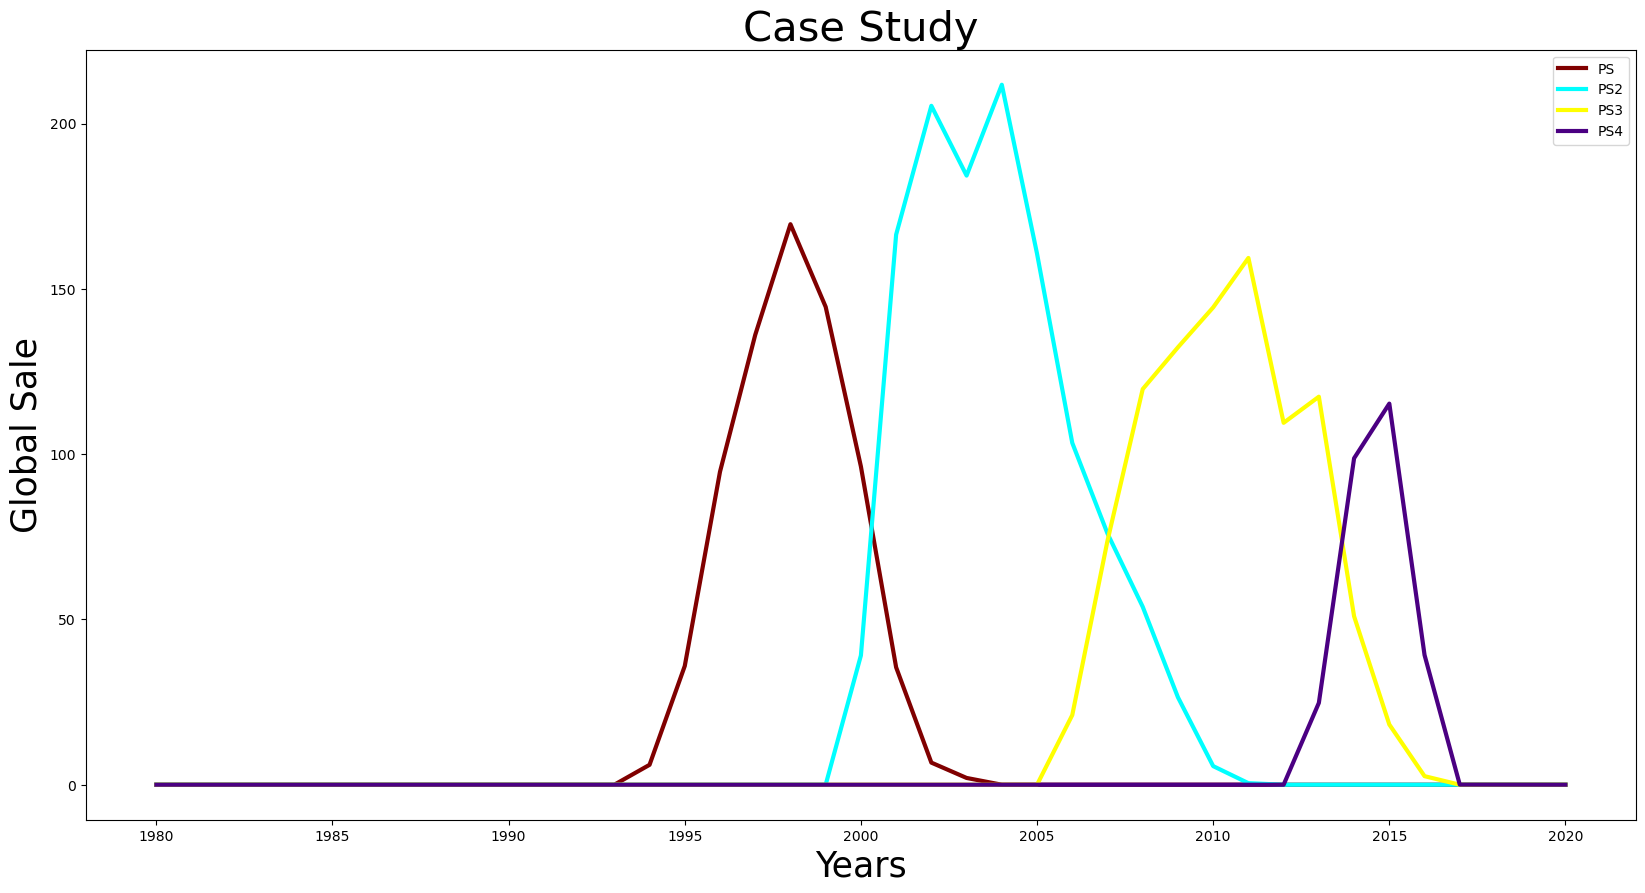

In [21]:
y = np.sort(data.Year.unique())

x1 = res[0:1][:].reshape(y.shape)
x2 = res[1:2][:].reshape(y.shape)
x3 = res[2:3][:].reshape(y.shape)
x4 = res[3:4][:].reshape(y.shape)

plt.style.use('default')
f = plt.figure(figsize=(20,10))
plt.plot(y,x1, color='maroon', label='PS',linewidth=3)
plt.plot(y,x2, color='aqua', label='PS2',linewidth=3)
plt.plot(y,x3, color='yellow', label='PS3',linewidth=3)
plt.plot(y,x4, color='indigo', label='PS4',linewidth=3)
plt.xlabel("Years",fontsize=25)
plt.ylabel("Global Sale",fontsize=25)
plt.title("Case Study",fontsize=30)
plt.legend()
plt.show()